### Import libraries 

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

### Load data 

In [2]:
# Read data
train =  pd.read_csv("loan_train.csv")

In [3]:
train.shape

(614, 13)

In [4]:
# Features in the dataset
train.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

### Understand data 

In [5]:
train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.describe(include='all')

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001751,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## Univariate Analysis

### Univariate Analysis for Categorical Variables 

In [9]:
train['LoanStatus'].value_counts()

Y    422
N    192
Name: LoanStatus, dtype: int64

In [10]:
# Normalize can be set to True to print proportions instead of number 
train['LoanStatus'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: LoanStatus, dtype: float64

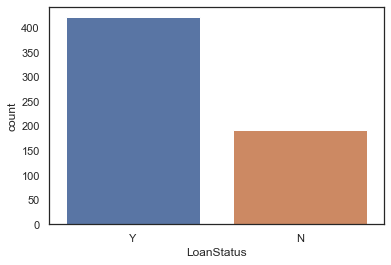

In [11]:
# Bar graph for loan_status
sns.countplot(x="LoanStatus", data=train)

In [12]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
# count number of null values 
train['Gender'].isnull().sum()

13

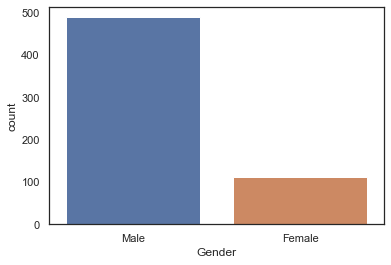

In [14]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

In [14]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

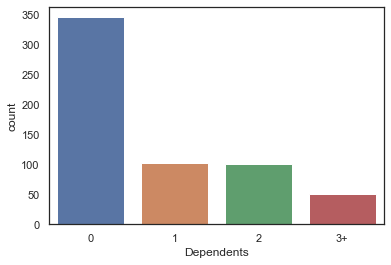

In [15]:
# Bar graph for dependents 
sns.countplot(x="Dependents", data=train)

In [17]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

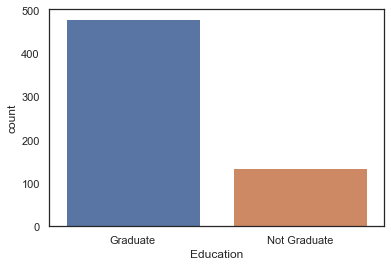

In [18]:
sns.countplot("Education", data=train)

In [19]:
train['SelfEmployed'].value_counts()

No     500
Yes     82
Name: SelfEmployed, dtype: int64

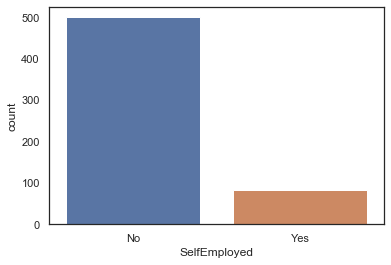

In [16]:
# Bar graph of Self_Employed
sns.countplot("SelfEmployed",data=train)

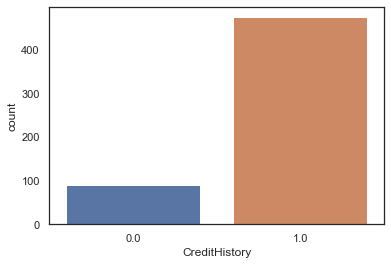

In [17]:
# Bar graph of Credit_History
sns.countplot(x='CreditHistory',data=train)

In [22]:
train['CreditHistory'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: CreditHistory, dtype: float64

In [23]:
train['PropertyArea'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: PropertyArea, dtype: int64

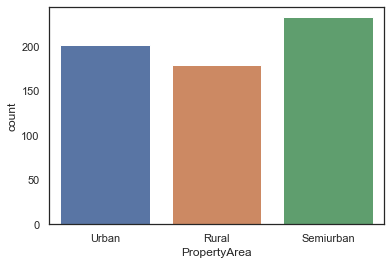

In [24]:
# Bar graph of Property_Area
sns.countplot(x='PropertyArea',data=train)

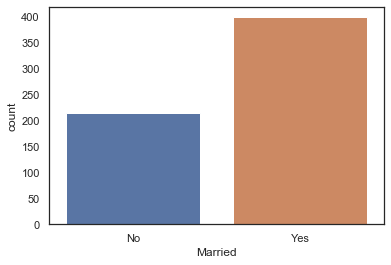

In [26]:
# Bar Graph for Married
sns.countplot(x="Married",data=train)

In [18]:
train.pivot_table(columns="Married",index="Dependents", values="LoanID", aggfunc=len)

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


In [19]:
print(train['SelfEmployed'].isnull().sum())   # Missing count 
print(train['Gender'].isnull().sum())   # Missing count 
print(train['Married'].isnull().sum())   # Missing count 
print(train['CreditHistory'].isnull().sum())   # Missing count 
print(train['Dependents'].isnull().sum())   # Missing count 
print(train['PropertyArea'].isnull().sum())   # Missing count 
print(train['Education'].isnull().sum())   # Missing count 

32
13
3
50
15
0
0


###  Univariate Analysis for Continous Variables 

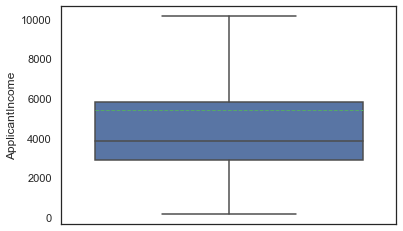

In [21]:
# Visualizing numerical features
#plt.gcf().set_size_inches(5,8)
sns.boxplot(x="ApplicantIncome",data=train, orient='vertical', showfliers=False, meanline=True, showmeans=True)

#### display how many outliers in ApplicantIncome 

In [34]:
app_income = train["ApplicantIncome"]

In [35]:
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print(q1,q2,q3)

2877.5 3812.5 5795.0


In [36]:
iqr = q3 - q1

In [37]:
iqr

2917.5

In [38]:
print("Upper Limit     : ", (q3 + 1.5 * iqr))
print("Lower Limit     : ", (q1 - 1.5 * iqr))
print("Higher outliers : ", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower  outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Upper Limit     :  10171.25
Lower Limit     :  -1498.75
Higher outliers :  50
Lower  outliers :  0


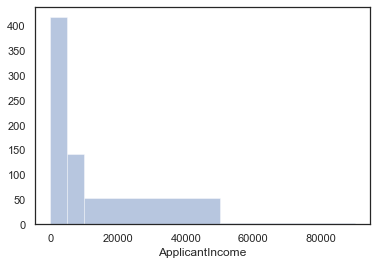

In [23]:
sns.distplot(train["ApplicantIncome"],bins=[0,5000,10000,50000,90000],kde=False)    # Histogram
# plt.gcf().set_size_inches(10,5)

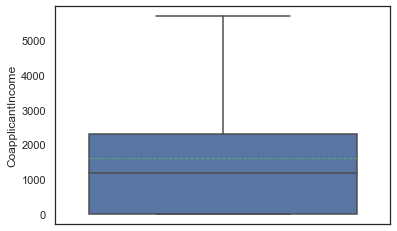

In [25]:
sns.boxplot(x="CoapplicantIncome",data=train, orient='vertical', showmeans=True, meanline=True, showfliers=False)

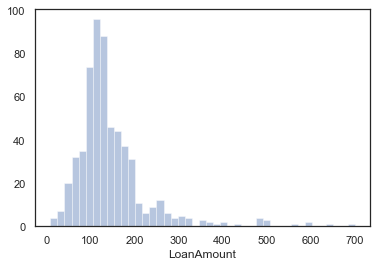

In [26]:
sns.distplot(train.loc[train['LoanAmount'].notna(),'LoanAmount'], kde=False)

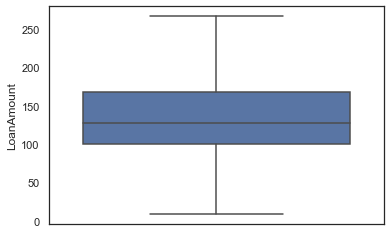

In [49]:
sns.boxplot(train["LoanAmount"], orient='vertical', showfliers = False)
#plt.gcf().set_size_inches(20,8)

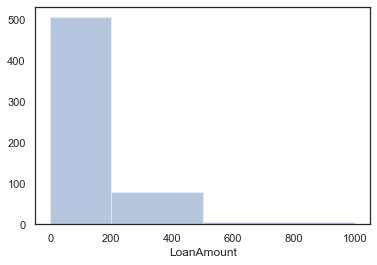

In [50]:
sns.distplot(train['LoanAmount'], bins=[0,200,500,1000], kde=False)

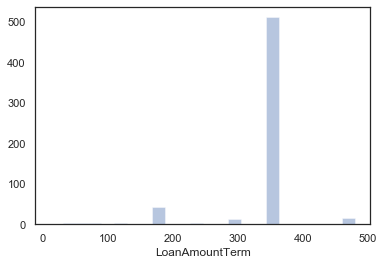

In [27]:
sns.distplot(train["LoanAmountTerm"], kde=False)

In [28]:
# Convert months to years and displays dist
(train.LoanAmountTerm / 12).value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
7.0       4
20.0      4
10.0      3
3.0       2
5.0       2
1.0       1
Name: LoanAmountTerm, dtype: int64

##  Bivariate Ananlysis

In [29]:
property_group = train.pivot_table(index='PropertyArea',columns="LoanStatus", values='LoanID',aggfunc=len)

In [56]:
property_group

LoanStatus,N,Y
PropertyArea,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [60]:
property_group.iloc[:,0] + property_group.iloc[:,1]

PropertyArea
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [58]:
property_group.iloc[:,0] / (property_group.iloc[:,0] + property_group.iloc[:,1])

PropertyArea
Rural        0.385475
Semiurban    0.231760
Urban        0.341584
dtype: float64

In [63]:
train.groupby(['PropertyArea','LoanStatus'])['LoanID'].count()

PropertyArea  LoanStatus
Rural         N              69
              Y             110
Semiurban     N              54
              Y             179
Urban         N              69
              Y             133
Name: LoanID, dtype: int64

In [64]:
train.groupby(['Gender','Education'], as_index=False)['ApplicantIncome'].mean()

,Gender,Education,ApplicantIncome
0,Female,Graduate,4646.467391
1,Female,Not Graduate,4629.700000
2,Male,Graduate,5992.345745
3,Male,Not Graduate,3630.061947


In [66]:
d = train.groupby(by=["LoanStatus","Married"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
# sns.catplot(x="Loan_Status",y="Loan_ID", hue="Gender",col="Married", data=d, kind="bar")

  LoanStatus Married  Count
0          N      No     79
1          N     Yes    113
2          Y      No    134
3          Y     Yes    285


In [67]:
train.pivot_table(index = "Married", columns="LoanStatus", values='LoanID',aggfunc=len)

LoanStatus,N,Y
Married,,
No,79,134
Yes,113,285


In [69]:
# Married vs. Unmarried rejection rates
113 / (285 + 113),  79 / (79 + 134)

(0.28391959798994976, 0.37089201877934275)

  LoanStatus Dependents  LoanID
0          N          0     107
1          N          1      36
2          N          2      25
3          N         3+      18
4          Y          0     238
5          Y          1      66
6          Y          2      76
7          Y         3+      33


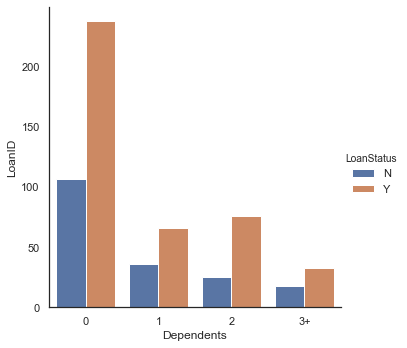

In [30]:
d = train.groupby(by=["LoanStatus","Dependents"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="Dependents",y="LoanID", hue="LoanStatus", data=d, kind="bar")

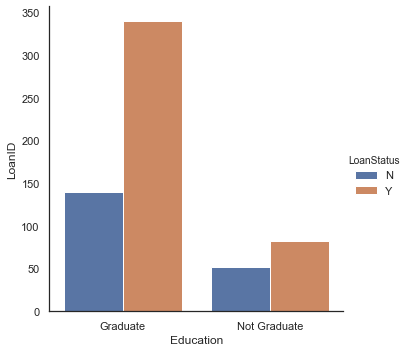

In [72]:
d = train.groupby(by=["LoanStatus","Education"], as_index=False)['LoanID'].count()
sns.catplot(x="Education",y="LoanID", hue="LoanStatus", data=d, kind="bar")

  LoanStatus SelfEmployed  LoanID
0          N           No     157
1          N          Yes      26
2          Y           No     343
3          Y          Yes      56


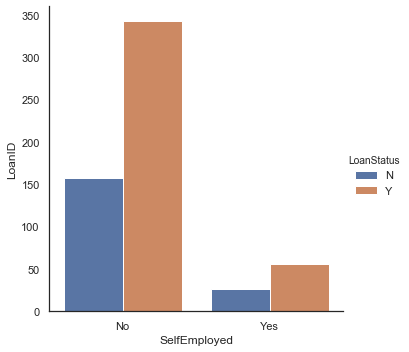

In [73]:
d = train.groupby(by=["LoanStatus","SelfEmployed"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="SelfEmployed",y="LoanID", hue="LoanStatus", data=d, kind="bar")

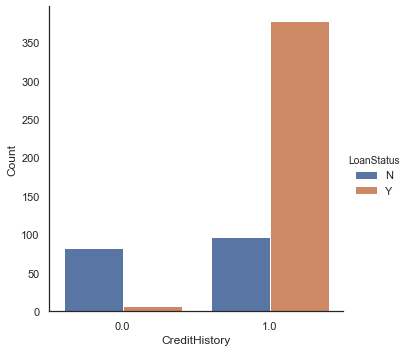

In [75]:
d = train.groupby(by=["LoanStatus","CreditHistory"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
sns.catplot(x="CreditHistory",y="Count", hue="LoanStatus", data=d, kind="bar")

  LoanStatus PropertyArea  Count
0          N        Rural     69
1          N    Semiurban     54
2          N        Urban     69
3          Y        Rural    110
4          Y    Semiurban    179
5          Y        Urban    133


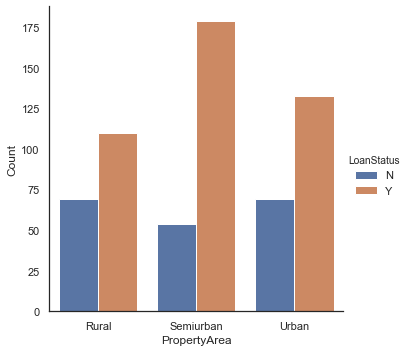

In [78]:
d = train.groupby(by=["LoanStatus","PropertyArea"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x="PropertyArea",y="Count", hue="LoanStatus", data=d, kind='bar')

  LoanStatus  Gender  LoanID
0          N  Female      37
1          N    Male     150
2          Y  Female      75
3          Y    Male     339


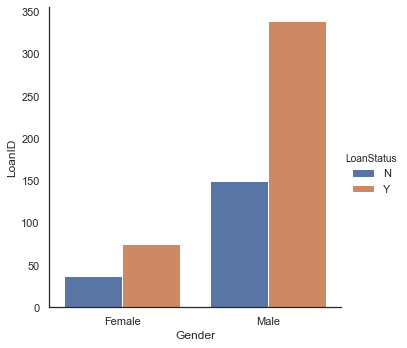

In [31]:
d = train.groupby(by=["LoanStatus","Gender"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="Gender",y="LoanID", hue="LoanStatus", data=d, kind="bar")

In [32]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,85000]
group=['Low','Average','High', 'Very high']
# Create a new column for income bin  
train['IncomeBin']= pd.cut(train['ApplicantIncome'],bins,labels=group)

In [33]:
train[['ApplicantIncome','IncomeBin']].sample(10)

,ApplicantIncome,IncomeBin
481,3095,Average
432,12876,Very high
611,8072,Very high
119,10408,Very high
416,2600,Average
580,6540,Very high
263,7200,Very high
169,8000,Very high
554,3593,Average
370,15759,Very high


  LoanStatus  IncomeBin  Count
0          N        Low     34
1          N    Average     67
2          N       High     45
3          N  Very high     46
4          Y        Low     74
5          Y    Average    159
6          Y       High     98
7          Y  Very high     91


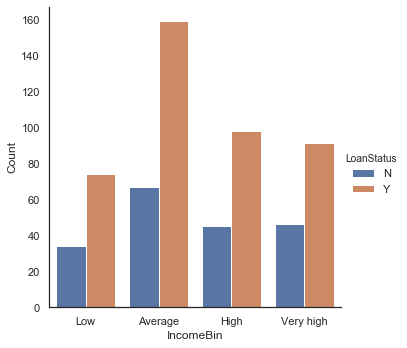

In [34]:
d = train.groupby(by=["LoanStatus","IncomeBin"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x="IncomeBin",y="Count", hue="LoanStatus", data=d, kind="bar")

In [36]:
# Making bins for Coapplicant income variable
bins=[-1,1000,3000,42000]
group=['Low','Average','High']
train['CoapplicantIncomeBin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

  LoanStatus CoapplicantIncomeBin  Count
0          N                  Low     99
1          N              Average     61
2          N                 High     32
3          Y                  Low    196
4          Y              Average    161
5          Y                 High     65


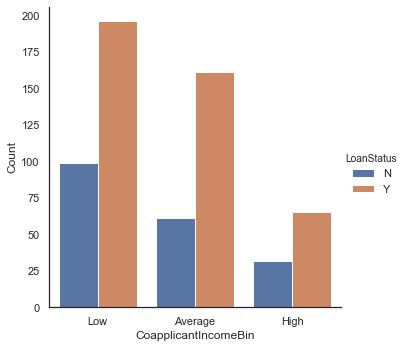

In [37]:
d = train.groupby(by=["LoanStatus","CoapplicantIncomeBin"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x="CoapplicantIncomeBin",y="Count", hue="LoanStatus", data=d, kind="bar")

In [38]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmountBin']=pd.cut(train['LoanAmount'],bins,labels=group)
train[['LoanAmount','LoanAmountBin']].head(10)

,LoanAmount,LoanAmountBin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


  LoanStatus LoanAmountBin  Count
0          N           Low     47
1          N       Average    103
2          N          High     31
3          Y           Low    107
4          Y       Average    255
5          Y          High     49


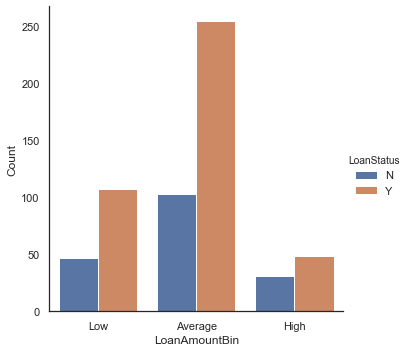

In [86]:
d = train.groupby(by=["LoanStatus","LoanAmountBin"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmountBin",y="Count", hue="LoanStatus", data=d, kind="bar")

### Bivariate for continuous variables 

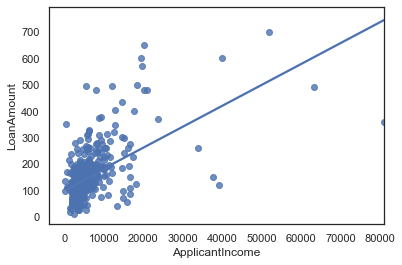

In [39]:
sns.regplot(x="ApplicantIncome", y = "LoanAmount", data = train,ci=False)

sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus',data = train)

###  Take total income and compare with loan amount and status 

In [90]:
train.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'IncomeBin', 'CoapplicantIncomeBin', 'LoanAmountBin'],
      dtype='object')

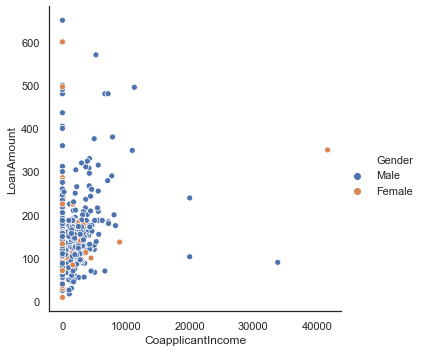

In [91]:
sns.relplot(x="CoapplicantIncome", y = "LoanAmount", hue='Gender',data = train,ci=False)

## Data Wrangling 

In [159]:
# Drop the new variable of bins
train=train.drop(['IncomeBin', 'CoapplicantIncome_Bin', 'LoanAmountBin'], axis=1)

In [3]:
train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Dependents 

In [4]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [5]:
# replacing 3+ in Dependents variable with 3
train['Dependents'].replace(to_replace ='3+', value='3',inplace=True)

In [6]:
train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

#### Loan_Status

In [7]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['LoanStatus'].replace(to_replace =['N','Y'], value=[0,1],inplace=True)

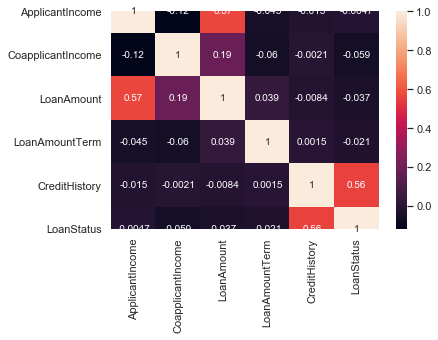

In [10]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr()
# print(matrix)
sns.heatmap(matrix, annot=True)
#plt.gcf().set_size_inches(20,10)

### Missing value and outlier treatment

In [11]:
# Checking the missing values
s = train.isnull().sum()
s [ s > 0]

Gender            13
Married            3
Dependents        15
SelfEmployed      32
LoanAmount        22
LoanAmountTerm    14
CreditHistory     50
dtype: int64

In [12]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [13]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['SelfEmployed'].fillna(train['SelfEmployed'].mode()[0], inplace=True)
train['CreditHistory'].fillna(train['CreditHistory'].mode()[0], inplace=True)

In [14]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [16]:
train['LoanAmountTerm'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: LoanAmountTerm, dtype: int64

In [18]:
train['LoanAmountTerm'].fillna(train['LoanAmountTerm'].mode()[0], inplace=True)

In [19]:
train.LoanAmount.median(), train.LoanAmount.mean()

(128.0, 146.41216216216216)

In [20]:
# Replace missing values
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [21]:
train.isnull().sum()

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

In [174]:
## handle outliers in LoanAmount, ApplicantIncome, CoApplicantIncome 

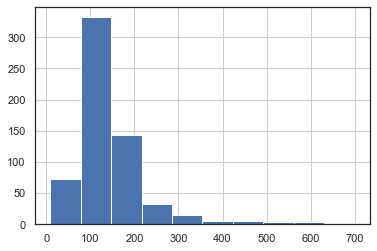

In [175]:
train['LoanAmount'].hist(bins=10)

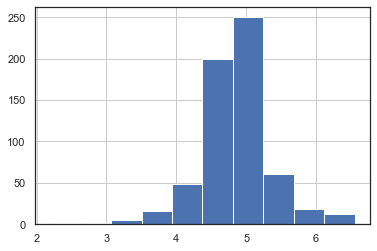

In [176]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=10)

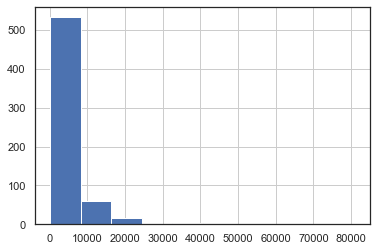

In [177]:
train['ApplicantIncome'].hist(bins=10)

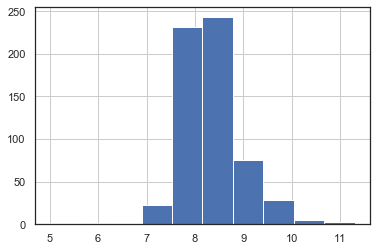

In [178]:
# Removing skewness in ApplicantIncome variable by log transformation
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])
train['ApplicantIncome_log'].hist(bins=10)

In [179]:
# Removing skewness in CoapplicantIncome variable by log transformation
# train['CoapplicantIncome_log'] = np.log(train['CoapplicantIncome'])

In [180]:
# Drop loan_ID column 
train=train.drop('Loan_ID',axis=1)

In [181]:
train = train.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome'],axis=1)

In [182]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'ApplicantIncome_log'],
      dtype='object')

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender                 614 non-null object
Married                614 non-null object
Dependents             614 non-null object
Education              614 non-null object
Self_Employed          614 non-null object
Loan_Amount_Term       614 non-null float64
Credit_History         614 non-null float64
Property_Area          614 non-null object
Loan_Status            614 non-null int64
LoanAmount_log         614 non-null float64
ApplicantIncome_log    614 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.8+ KB


In [184]:
# Adding dummies to the dataset for all categorical features 
train=pd.get_dummies(train)

In [185]:
train.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'ApplicantIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
LoanAmount_log             614 non-null float64
ApplicantIncome_log        614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3               614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area

In [187]:
# Save dataframe
train.to_csv("final_train.csv",index=False)

## Load data from final csv

In [94]:
train = pd.read_csv("final_train.csv")

## Build Model using Logistic Regression

In [9]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Split data into train and test data 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [251]:
X_train.shape, X_test.shape

((491, 19), (123, 19))

In [11]:
# logistic regression   
model = LogisticRegression()
model.fit(X_train,y_train)

e:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Check model's performance with train data 
model.score(X_train,y_train)

0.8044806517311609

In [13]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8292682926829268


### Display confusion matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [18]:
print('Accuracy : ',(cm[0,0] + cm[1,1]) / len(y_test))

Accuracy :  0.8292682926829268


In [23]:
print("True Positive rate : ", cm[1,1] / ( cm[1,0] + cm[1,1]))

True Positive rate :  0.9777777777777777


In [24]:
print("True Negative rate : ", cm[0,0] / (cm[0,0] + cm[0,1]) )

True Negative rate :  0.42424242424242425


### Display classification report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.6747967479674797


In [98]:
confusion_matrix(y_test, y_pred)

array([[21, 12],
       [28, 62]], dtype=int64)

In [101]:
from sklearn.metrics import precision_score

In [102]:
precision_score(y_test,y_pred)

0.8378378378378378

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.64      0.51        33
           1       0.84      0.69      0.76        90

    accuracy                           0.67       123
   macro avg       0.63      0.66      0.63       123
weighted avg       0.73      0.67      0.69       123



### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.9935064935064936


## Naive Bayes 

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8292682926829268


In [107]:
confusion_matrix(y_test, y_pred)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## Support Vector Machines

In [109]:
from sklearn.svm import SVC

In [110]:
model = SVC()
model.fit(X_train,y_train)

e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [111]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8130081300813008


In [112]:
confusion_matrix(y_test, y_pred)


array([[12, 21],
       [ 2, 88]], dtype=int64)

In [222]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        46
          1       0.70      1.00      0.82       108

avg / total       0.49      0.70      0.58       154



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Check cross validation scores with different algorithms 

In [22]:
train = pd.read_csv("final_train.csv")
train_o = pd.read_csv("loan_train.csv")
y = train_o.Loan_Status

In [23]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [24]:
train =pd.get_dummies(train)

In [25]:
train.shape

(614, 19)

In [26]:
train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
Dependents                 614 non-null int64
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: flo

In [30]:
X = train
X.shape

(614, 19)

In [28]:
y.shape

(614,)

In [29]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [31]:
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f%%' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1. 1. 1. 1. 1.]
The accuration of LogisticRegression is 100.00%


d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of GaussianNB is %.2f%%' % (scores.mean()*100))
all_scores['GaussianNB'] = scores.mean() * 100

[1.         0.98387097 0.99180328 0.98360656 1.        ]
The accuration of GaussianNB is 99.19%


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of DecisionTreeClassifier is %.2f%%' % (scores.mean()*100))
all_scores['DecisionTreeClassifier'] = scores.mean() * 100

[1. 1. 1. 1. 1.]
The accuration of DecisionTreeClassifier is 100.00%


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=10)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of RandomForestClassifier is %.2f%%' % (scores.mean()*100))
all_scores['RandomForestClassifier'] = scores.mean() * 100

The accuration of RandomForestClassifier is 99.84%


[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier')]

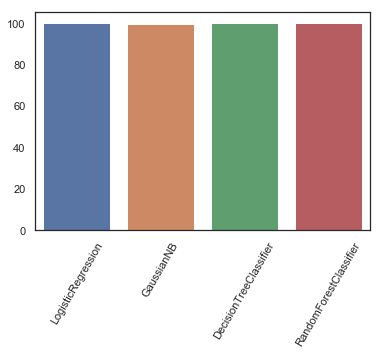

In [36]:
all_scores.keys()
all_scores.values()
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logestic Regression with built-in Cross Validation

In [193]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [195]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8051948051948052
